In [178]:
# Data Retrieval Module

In [508]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime



# The time period that will be used for this analysis


start_date = datetime(2013, 1, 2, tzinfo=pytz.timezone('America/New_York'))
end_date = datetime(2023, 9, 1, tzinfo=pytz.timezone('America/New_York'))


# List of equities

stocks_list = ['AAPL', 'AMZN', 'GE', 'IBM', 'JNJ', 'JPM', 'KO', 'XOM']

# Daily adjusted prices for the above stocks over a 10 year period

stock_data = yf.download(stocks_list, start_date, end_date, actions=True)

# List of bond ETFs from varying issuers and industries

bonds_list = ['LQD', 'HYG', 'IEF', 'TIP', 'MUB', 'REM',]

# List containing all the assets in the portfolio
portfolio_list = stocks_list + bonds_list


# Daily adjusted prices for the above bond ETFS over a 10 year period

bond_data =yf.download(bonds_list, start_date, end_date, actions=True)




[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  6 of 6 completed


In [509]:
# Risk and Return Metrics

In [510]:
import pytz  # Import the pytz module for timezone handling
import statsmodels.api as sm

# Define the date range as tz-aware datetime objects (Eastern Time)

start_date = datetime(2013, 1, 2, tzinfo=pytz.timezone('America/New_York'))
end_date = datetime(2023, 9, 1, tzinfo=pytz.timezone('America/New_York'))


# Define the risk-free rate (3 Month Treasury Bill Rate)
risk_free_rate = 0.0533
        
# Create a dictionary to store total dividend income for each stock
total_dividend_income_dict = {}

# Loop through each stock symbol
for symbol in stocks_list:
    
    stock = yf.Ticker(symbol)

    # Get dividend data for the specified date range
    dividend_data = stock.dividends[(stock.dividends.index >= start_date) & (stock.dividends.index <= end_date)]

    # Calculate the total dividend income for the stock
    total_dividend_income = dividend_data.sum()

    # Add the total dividend income to the dictionary with the stock symbol as the key
    total_dividend_income_dict[symbol] = total_dividend_income

    
    
# Define a list of dividends corresponding to each stock
dividends = [7.320359000000001, 0.0, 29.622560999999994, 29.622560999999994, 38.190000000000005, 28.560000000000002, 15.700000000000001, 33.989999999999995]
print(total_dividend_income_dict)

# Create an empty dictionary to store the total returns
total_returns = {}

# Fetch the data for each stock
for stock_symbol, dividend in zip(stocks_list, dividends):
    
    stock_data = yf.Ticker(stock_symbol)
    
    # Fetch historical price data for the specified date range
    stock_history = stock_data.history(start=start_date, end=end_date)
    
    # Calculate the beginning and ending values
    beginning_value = stock_history['Close'].iloc[0]
    ending_value = stock_history['Close'].iloc[-1]
    
    # Calculate the total return using the formula
    total_return = ((ending_value - beginning_value) + dividend) / beginning_value * 100
    
    # Store the total returns in the dictionary
    total_returns[stock_symbol] = total_return

# Print the total returns for each stock
for stock_symbol, returns in total_returns.items():
    print(f'{stock_symbol} Total Return (%): {returns:.2f}%')

    

# Create an empty dictionary to store the simple annualised returns
annualised_returns = {}

# Fetch the data for each stock 
for stock_symbol in stocks_list:

    stock_data = yf.Ticker(stock_symbol)
     
    # Fetch historical price data for the specified date range
    stock_history = stock_data.history(start=start_date, end=end_date)

    # Calculate the total returns values
    beginning_value = stock_history['Close'].iloc[0]
    
    ending_value = stock_history['Close'].iloc[-1]
    
    total_return = (ending_value - beginning_value)
    
    # Assume the value of the initial investment
    initial_investment = 25000

    # Calculate the number of days the investment was held
    holding_period = end_date - start_date

    # Extract the number of days from the difference
    holding_period_days = holding_period.days

    # Calculate the total return using the formula
    annualised_return = (total_return / initial_investment ) * (365 / holding_period_days ) * 100
    
    # Store the annualized return in the dictionary
    annualised_returns[stock_symbol] = annualised_return

    
# Print the simple annualised returns for each stock
for stock_symbol, returns in annualised_returns.items():
    print(f'{stock_symbol} Simple Annualised Return (%): {returns:.2f}%')


    
# Create an empty dictionary to store historical data for each stock
stock_data_dict = {}

# Fetch the data for each stock and store it in the dictionary
for stock_symbol in stocks_list:
    stock_data = yf.Ticker(stock_symbol)
    stock_history = stock_data.history(start=start_date, end=end_date)
    stock_data_dict[stock_symbol] = stock_history

    
# Create an empty dictionary to store the compound annual growth rates
compound_annual_growth_rates = {}

    
# Calculate the compound annual growth rate for each stock
for stock_symbol, stock_history in stock_data_dict.items():


    # Calculate the value of the investment at the beginning and end of the period
    beginning_value = stock_history['Close'].iloc[0]
    
    ending_value = stock_history['Close'].iloc[-1]
    
    # State the number of years over which the growth has occured
    years= 10
    
    # Calculate the compound annual growth rate using the formula 
    cagr = ((ending_value / beginning_value) ** (1/years) - 1) * 100

   # Store the compound annual growth rates in the dictionary
    compound_annual_growth_rates[stock_symbol] = cagr
    
    
# Print the compound annual growth rates for each stock
for stock_symbol, cagr in compound_annual_growth_rates.items():
    print(f'{stock_symbol} Compound Annual Growth Rate (%): {cagr:.2f}')
    
    


# Create a dictionary to store coupons received for each bond ETF
total_coupon_income_dict = {}


# Loop through each bond symbol
for symbol in bonds_list:
    
    # Fetch historical bond ETF price data 
    bond_data = yf.Ticker(symbol)
    
    # Get dividend data for the specified date range (assuming dividends represent coupon payments)
    dividends_data = bond_data.dividends[(bond_data.dividends.index >= start_date) & (bond_data.dividends.index <= end_date)]
   
    # Calculate the total coupon income for the bond
    total_coupon_income = dividends_data.sum()
    
    # Add the total coupon income to the dictionary with the bond symbol as the key
    total_coupon_income_dict[symbol] = total_coupon_income
    
    
    


# Create an empty dictionary to store the total returns
total_returns_bond = {}

# Fetch data and calculate total returns for each bond
for bond_symbol in bonds_list:
    
    # Fetch historical bond price data
    bond_data = yf.Ticker(bond_symbol)
    
    # Get dividend data for the specified date range (assuming dividends represent coupon payments)
    dividends_data = bond_data.dividends[(bond_data.dividends.index >= start_date) & (bond_data.dividends.index <= end_date)]
    
    # Fetch historical bond price data
    bond_history = bond_data.history(start=start_date, end=end_date)
    
    # Calculate the beginning and ending values
    beginning_value = bond_history['Close'].iloc[0]
    ending_value = bond_history['Close'].iloc[-1]
    
    # Calculate the capital gains as the change in bond price
    capital_gains = (ending_value - beginning_value)
    
    # Calculate the total return using the formula
    total_return = ((capital_gains + dividends_data.sum()) / beginning_value) * 100
    
    # Store the total return in the dictionary
    total_returns_bond[bond_symbol] = total_return
    
# Print the total returns for each bond
for bond_symbol, returns in total_returns_bond.items():
    print(f'{bond_symbol} Total Return (%): {returns:.2f}%')
    
    
    



# Create an empty dictionary to store the simple annualised returns
annualised_returns_bond = {}

# Fetch the data for each bond 
for bond_symbol in bonds_list:

    bond_data = yf.Ticker(stock_symbol)
     
    # Fetch historical price data for the specified date range
    bond_history = bond_data.history(start=start_date, end=end_date)

    # Calculate the total returns values
    beginning_value = bond_history['Close'].iloc[0]
    
    ending_value = bond_history['Close'].iloc[-1]
    
    total_return_bond = (ending_value - beginning_value)
    
    # Assume the value of the initial investment
    initial_investment = 25000

    # Calculate the number of days the investment was held
    holding_period = end_date - start_date

    # Extract the number of days from the difference
    holding_period_days = holding_period.days

    # Calculate the total return using the formula
    annualised_return_bond = (total_return_bond / initial_investment ) * (365 / holding_period_days ) * 100
    
    # Store the annualized return in the dictionary
    annualised_returns_bond[bond_symbol] = annualised_return_bond

    
# Print the simple annualised returns for each bond ETF
for bond_symbol, returns in annualised_returns_bond.items():
    print(f'{bond_symbol} Simple Annualised Return (%): {returns:.2f}%')



# Create an empty dictionary to store historical data for each bond ETF
bond_data_dict = {}

# Fetch the data for each stock and store it in the dictionary
for bond_symbol in bonds_list:
    bond_data = yf.Ticker(bond_symbol)
    bond_history = bond_data.history(start=start_date, end=end_date)
    bond_data_dict[bond_symbol] = bond_history
    
    
    
    
    

# Create an empty dictionary to store the compound annual growth rates
compound_annual_growth_rates_bond = {}

    
# Calculate the compound annual growth rate for each bond ETF
for bond_symbol, bond_history in bond_data_dict.items():


    # Calculate the value of the investment at the beginning and end of the period
    beginning_value = bond_history['Close'].iloc[0]
    
    ending_value = bond_history['Close'].iloc[-1]
    
    # State the number of years over which the growth has occured
    years= 10
    
    # Calculate the compound annual growth rate using the formula 
    cagr = ((ending_value / beginning_value) ** (1/years) - 1) * 100

   # Store the compound annual growth rates in the dictionary
    compound_annual_growth_rates_bond[bond_symbol] = cagr
    
    
# Print the compound annual growth rates for each bond ETF
for bond_symbol, cagr in compound_annual_growth_rates_bond.items():
    print(f'{bond_symbol} Compound Annual Growth Rate (%): {cagr:.2f}')
    

# Create an empty list to store the stock dataset
stock_dataset = []

# Fetch the data for each stock
for stock_symbol, dividend in zip(stocks_list, dividends):
    
    stock_data = yf.Ticker(stock_symbol)
    
    # Fetch historical price data for the specified date range
    stock_history = stock_data.history(start=start_date, end=end_date)
    
    # Calculate the beginning and ending values
    beginning_value = stock_history['Close'].iloc[0]
    ending_value = stock_history['Close'].iloc[-1]
    
    # Add every value between the beginning and end values to the dataset
    stock_dataset.extend(stock_history['Close'])

# Calculate the standard deviation of the dataset
stock_standard_deviation = np.std(stock_dataset)
    
# Print the standard deviation for the dataset
print('The Standard Deviation (Risk) of the stock dataset is', stock_standard_deviation)



# Define the market index
market_index_symbol = "^GSPC"  # S&P 500

# Create an empty list to store stock betas
stock_betas = []

# Fetch the data for each stock
for stock_symbol in stocks_list:

    # Fetch historical price data for the stock and the market index
    stock_data = yf.Ticker(stock_symbol)
    market_data = yf.Ticker(market_index_symbol)

    stock_history = stock_data.history(start=start_date, end=end_date)
    market_history = market_data.history(start=start_date, end=end_date)

    # Calculate daily returns for the stock and the market index
    stock_returns = stock_history['Close'].pct_change().dropna()
    market_returns = market_history['Close'].pct_change().dropna()

    # Add a constant for the regression model
    X = sm.add_constant(market_returns)

    # Fit a linear regression model
    model = sm.OLS(stock_returns, X).fit()

    # The beta is the coefficient of the market returns in the regression model
    stock_beta = model.params.iloc[1]

    # Append the beta to the list
    stock_betas.append((stock_symbol, stock_beta))

# Print the betas for each stock
for stock_symbol, stock_beta in stock_betas:
    print(f"The beta for {stock_symbol} relative to {market_index_symbol} is {stock_beta:.2f}")
    print("Stocks with betas higher than 1.0 can be interpreted as more volatile than the S&P 500.")
   









    
# Define a function to calculate the maximum drawdown for a single stock
def calculate_max_drawdown(stock_symbol):
    # Fetch historical price data for the stock
    stock_data = yf.Ticker(stock_symbol)
    stock_history = stock_data.history(start=start_date, end=end_date)
    
    # Extract the 'Close' prices from the historical data
    prices = stock_history['Close']
    
    # Calculate the maximum drawdown
    max_drawdown = 0.0
    peak_price = prices.iloc[0]
    
    for price in prices:
        if price > peak_price:
            peak_price = price
        else:
            drawdown = (peak_price - price) / peak_price
            max_drawdown = max(max_drawdown, drawdown)
    
    # Convert the maximum drawdown to a percentage
    max_drawdown_percentage = max_drawdown * 100
    
    # Print the maximum drawdown for the stock
    print(f"The maximum drawdown for {stock_symbol} from {start_date} to {end_date} is {max_drawdown_percentage:.2f}%")

# Calculate and print the maximum drawdown for each stock in the list
for stock_symbol in stocks_list:
    calculate_max_drawdown(stock_symbol)
    
    
# Fetch historical price data for the stocks and create a DataFrame
stock_data = yf.download(stocks_list, start=start_date, end=end_date)['Adj Close']

# Calculate the correlation matrix for all pairs of stocks
correlation_matrix = stock_data.corr()



# Fetch historical price data for the assets and create a DataFrame
stock_data = yf.download(stocks_list, start=start_date, end=end_date)['Adj Close']

# Calculate the covariance matrix for all pairs of assets
covariance_matrix = stock_data.cov()



# Create an empty list to store the bond ETF dataset
bond_dataset = []

# Fetch the data for each bond ETF
for bond_symbol in bonds_list:
    
    bond_data = yf.Ticker(bond_symbol)
    
    # Fetch historical price data for the specified date range
    bond_history = bond_data.history(start=start_date, end=end_date)
    
    # Add closing prices to the dataset
    bond_dataset.extend(bond_history['Close'].dropna().values)

# Calculate the standard deviation of the dataset
bond_standard_deviation = np.std(bond_dataset)
    
# Print the standard deviation for the dataset
print('The Standard Deviation (Risk) of the bond ETF dataset is', bond_standard_deviation)






# Define the market index
market_index_symbol = "^GSPC"  # S&P 500

# Create an empty list to store bond ETF betas
bond_betas = []

# Fetch the data for each bond ETF
for bond_symbol in bonds_list:

    # Fetch historical price data for the bond ETF and the market index
    bond_data = yf.Ticker(bond_symbol)
    market_data = yf.Ticker(market_index_symbol)

    bond_history = bond_data.history(period="1d", start=start_date, end=end_date)
    market_history = market_data.history(period="1d", start=start_date, end=end_date)

    # Calculate daily returns for the bond ETF and the market index
    bond_returns = bond_history['Close'].pct_change().dropna()
    market_returns = market_history['Close'].pct_change().dropna()

    # Add a constant for the regression model
    X = sm.add_constant(market_returns)

    # Fit a linear regression model
    model = sm.OLS(bond_returns, X).fit()

    # The beta is the coefficient of the market returns in the regression model
    bond_beta = model.params.iloc[1]

    # Append the beta to the list
    bond_betas.append((bond_symbol, bond_beta))

# Print the betas for each bond ETF
for bond_symbol, bond_beta in bond_betas:
    print(f"The beta for {bond_symbol} relative to {market_index_symbol} is {bond_beta:.2f}")
    print("Bond ETFs with betas higher than 1.0 can be interpreted as more volatile than the S&P 500")


    
    
    
    
    

    
# Define a function to calculate the maximum drawdown for a single bond ETF
def calculate_max_drawdown(bond_symbol):
    # Fetch historical price data for the bond ETF
    bond_data = yf.Ticker(bond_symbol)
    bond_history = bond_data.history(start=start_date, end=end_date)
    
    # Extract the 'Close' prices from the historical data
    prices = bond_history['Close']
    
    # Calculate the maximum drawdown
    max_drawdown = 0.0
    peak_price = prices.iloc[0]
    
    for price in prices:
        if price > peak_price:
            peak_price = price
        else:
            drawdown = (peak_price - price) / peak_price
            max_drawdown = max(max_drawdown, drawdown)
    
    # Convert the maximum drawdown to a percentage
    max_drawdown_percentage = max_drawdown * 100
    
    # Print the maximum drawdown for the bond ETF
    print(f"The maximum drawdown for {bond_symbol} from {start_date} to {end_date} is {max_drawdown_percentage:.2f}%")

# Calculate and print the maximum drawdown for each bond ETF in the list
for bond_symbol in bonds_list:
    calculate_max_drawdown(bond_symbol)
    
    
    
    
# Fetch historical price data for the stocks and create a DataFrame
bond_data = yf.download(bonds_list, start=start_date, end=end_date)['Adj Close']

# Calculate the correlation matrix for all pairs of stocks
correlation_matrix = bond_data.corr()




# Fetch historical price data for the assets and create a DataFrame
bond_data = yf.download(bonds_list, start=start_date, end=end_date)['Adj Close']

# Calculate the covariance matrix for all pairs of assets
covariance_matrix = bond_data.cov()











{'AAPL': 7.320359000000001, 'AMZN': 0.0, 'GE': 29.622560999999994, 'IBM': 59.481067999999986, 'JNJ': 38.190000000000005, 'JPM': 28.560000000000002, 'KO': 15.700000000000001, 'XOM': 33.989999999999995}
AAPL Total Return (%): 1062.46%
AMZN Total Return (%): 972.71%
GE Total Return (%): 38.79%
IBM Total Return (%): 44.17%
JNJ Total Return (%): 278.62%
JPM Total Return (%): 424.74%
KO Total Return (%): 179.85%
XOM Total Return (%): 156.14%
AAPL Simple Annualised Return (%): 0.06%
AMZN Simple Annualised Return (%): 0.05%
GE Simple Annualised Return (%): 0.00%
IBM Simple Annualised Return (%): 0.01%
JNJ Simple Annualised Return (%): 0.04%
JPM Simple Annualised Return (%): 0.04%
KO Simple Annualised Return (%): 0.01%
XOM Simple Annualised Return (%): 0.02%
AAPL Compound Annual Growth Rate (%): 27.31
AMZN Compound Annual Growth Rate (%): 26.78
GE Compound Annual Growth Rate (%): 0.98
IBM Compound Annual Growth Rate (%): 1.84
JNJ Compound Annual Growth Rate (%): 11.84
JPM Compound Annual Growth

In [578]:
# Portfolio Optimisation

In [594]:
from scipy.optimize import minimize

# Fetch historical price data for the assets and create a DataFrame
asset_data = yf.download(portfolio_list, start=start_date, end=end_date)['Adj Close']

# Calculate expected returns as the mean of historical daily returns
expected_returns = asset_data.pct_change().mean()

# Define the covariance matrix
covariance_matrix = asset_data.pct_change().cov()

# Define constraints (e.g., minimum and maximum weights)
min_weight = 0.01  # Minimum 1% weight in any asset
max_weight = 0.5   # Maximum 50% weight in any asset

# Define bounds for expected return (between 0.0 and 6.5%)
expected_return_bounds = (0.0, 0.065)

# Create an empty list to store portfolio metrics
portfolio_metrics = []

# Generate a range of expected returns for plotting the efficient frontier
target_returns = np.linspace(expected_return_bounds[0], expected_return_bounds[1], 100)

# Calculate the efficient frontier for different target returns
for target_return in target_returns:
    # Define constraints
    constraints = (
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Weight sum constraint
        {'type': 'ineq', 'fun': lambda weights: min_weight - weights},  # Minimum weight constraint
        {'type': 'ineq', 'fun': lambda weights: weights - max_weight},   # Maximum weight constraint
        {'type': 'eq', 'fun': lambda weights, target_return=target_return: 
            np.sum(expected_returns * weights) - target_return},  # Target return constraint
    )
    
    # Define the objective function (Sharpe ratio for maximization)
    def objective(weights):
        portfolio_return = np.sum(expected_returns * weights)
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev  # Sharpe ratio for maximization
        return -sharpe_ratio  # Negative Sharpe ratio for minimization

    # Define initial weights with random values
    initial_weights = np.random.rand(len(portfolio_list))
    initial_weights /= np.sum(initial_weights)  # Normalize to ensure they sum to 1

    # Define bounds for weights (optional)
    bounds = [(0, 1)] * len(portfolio_list)  # Weights between 0% and 100%

    # Run the optimization to find the optimal portfolio weights
    result = minimize(objective, initial_weights, constraints=constraints, bounds=bounds)

    # Extract the optimal weights
    optimal_weights = result.x

    # Calculate portfolio metrics for the optimized portfolio
    portfolio_return = np.sum(expected_returns * optimal_weights)
    portfolio_stddev = np.sqrt(np.dot(optimal_weights.T, np.dot(covariance_matrix, optimal_weights)))
    
    # Calculate Sharpe ratio for the optimized portfolio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

    # Append portfolio metrics to the list
    portfolio_metrics.append([target_return, portfolio_stddev, sharpe_ratio])

# Convert the portfolio metrics list to a DataFrame
efficient_frontier_df = pd.DataFrame(portfolio_metrics, columns=['Expected Return', 'Standard Deviation', 'Sharpe Ratio'])


[*********************100%%**********************]  14 of 14 completed


In [595]:
# Performance Metrics

In [596]:
# Print the results

print("Optimal Portfolio Weights:")
for asset, weight in zip(portfolio_list, optimal_weights):
    print(f"{asset}: {weight:.4f}")

print(f"Expected Portfolio Return: {portfolio_return:.4f}")
print(f"Portfolio Standard Deviation: {portfolio_stddev:.4f}")
print(f"Portfolio Sharpe Ratio: {sharpe_ratio:.4f}")



Optimal Portfolio Weights:
AAPL: 0.0898
AMZN: 0.0999
GE: 0.0069
IBM: 0.0800
JNJ: 0.1006
JPM: 0.0222
KO: 0.0770
XOM: 0.0715
LQD: 0.0489
HYG: 0.0994
IEF: 0.0748
TIP: 0.0585
MUB: 0.1008
REM: 0.0697
Expected Portfolio Return: 0.0004
Portfolio Standard Deviation: 0.0074
Portfolio Sharpe Ratio: -7.1956


In [597]:
# Visualisation

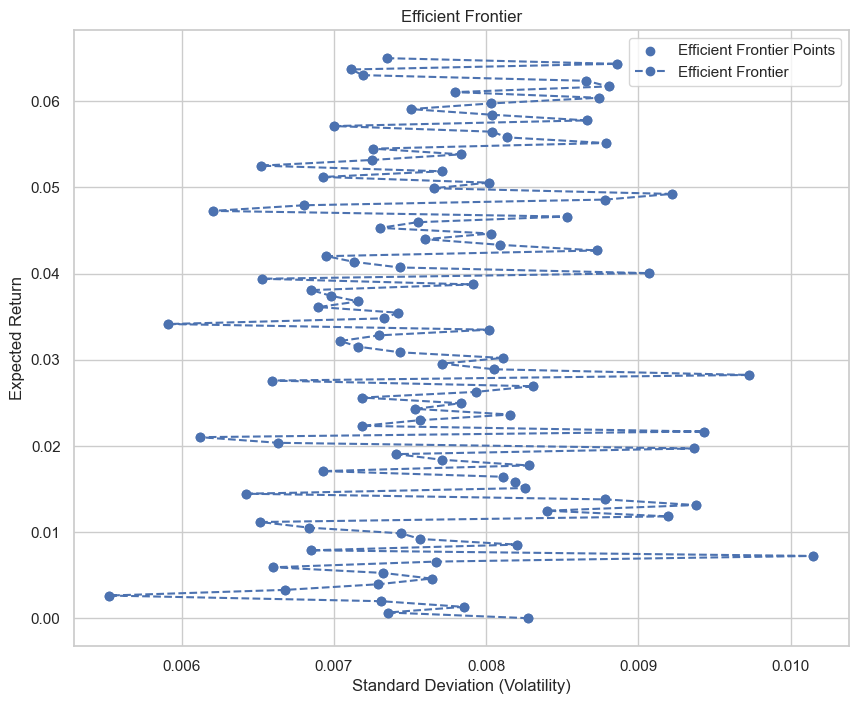

In [613]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the 'whitegrid' style
sns.set(style='whitegrid')

# Plot the efficient frontier
plt.figure(figsize=(10, 8))
plt.scatter(x='Standard Deviation', y='Expected Return', data=efficient_frontier_df, color='b', label='Efficient Frontier Points')
plt.plot(efficient_frontier_df['Standard Deviation'], efficient_frontier_df['Expected Return'], 'b--o', label='Efficient Frontier')  # Specify the color and linestyle for the Efficient Frontier
plt.xlabel('Standard Deviation (Volatility)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.legend()
plt.show()

